In [103]:
import geopandas as gpd
import pandas as pd
import numpy as np


In [114]:
train_df = gpd.read_file('gp_res_100_frac1.gpkg')
train_df



,INSPIRE_ID,index,ID,B02,CODE,B04,B03,B08,NDVI,time_start,time_end,geometry
0,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0,0,528.0,311,516.0,724.0,3818.0,0.412993,2021-04-01 00:00:00+00:00,2021-05-01 00:00:00+00:00,MULTIPOINT (428690.027 5711938.189)
1,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,1,1,765.0,131,665.0,875.0,3778.0,0.391652,2021-04-01 00:00:00+00:00,2021-05-01 00:00:00+00:00,MULTIPOINT (427819.337 5710040.545)
2,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,2,2,470.0,115,590.0,604.0,2433.0,0.237053,2021-04-01 00:00:00+00:00,2021-05-01 00:00:00+00:00,MULTIPOINT (427320.866 5710158.178)
3,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,265,3,349.0,459,474.0,524.0,2533.0,0.211571,2021-04-01 00:00:00+00:00,2021-05-01 00:00:00+00:00,MULTIPOINT (431527.388 5693772.886)
4,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,266,4,339.0,459,433.0,538.0,2784.0,0.205698,2021-04-01 00:00:00+00:00,2021-05-01 00:00:00+00:00,MULTIPOINT (431535.193 5693614.690)
...,...,...,...,...,...,...,...,...,...,...,...,...
345949,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,732423,49419,456.0,115,756.0,796.0,2952.0,0.270542,2021-10-01 00:00:00+00:00,2021-11-01 00:00:00+00:00,MULTIPOINT (472357.075 5696612.529)
345950,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,732424,49420,433.0,115,772.0,764.0,2907.0,0.243638,2021-10-01 00:00:00+00:00,2021-11-01 00:00:00+00:00,MULTIPOINT (472016.875 5697690.039)
345951,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,732425,49421,410.0,115,669.0,758.0,3570.0,0.291890,2021-10-01 00:00:00+00:00,2021-11-01 00:00:00+00:00,MULTIPOINT (471981.413 5696219.338)
345952,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,732426,49422,342.0,411,517.0,598.0,3445.0,0.251615,2021-10-01 00:00:00+00:00,2021-11-01 00:00:00+00:00,MULTIPOINT (471704.064 5697043.769)


In [141]:
train_df["month"] = train_df["time_start"].apply(lambda x: x.strftime('%m'))
train_df

,INSPIRE_ID,index,ID,B02,CODE,B04,B03,B08,NDVI,time_start,time_end,geometry,month,USE_CODE_x,USE_CODE_y
0,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,0,0,528.0,311,516.0,724.0,3818.0,0.412993,2021-04-01 00:00:00+00:00,2021-05-01 00:00:00+00:00,MULTIPOINT (428690.027 5711938.189),04,OE,OE
1,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,1,1,765.0,131,665.0,875.0,3778.0,0.391652,2021-04-01 00:00:00+00:00,2021-05-01 00:00:00+00:00,MULTIPOINT (427819.337 5710040.545),04,GT,GT
2,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,2,2,470.0,115,590.0,604.0,2433.0,0.237053,2021-04-01 00:00:00+00:00,2021-05-01 00:00:00+00:00,MULTIPOINT (427320.866 5710158.178),04,GT,GT
3,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,265,3,349.0,459,474.0,524.0,2533.0,0.211571,2021-04-01 00:00:00+00:00,2021-05-01 00:00:00+00:00,MULTIPOINT (431527.388 5693772.886),04,GL,GL
4,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,266,4,339.0,459,433.0,538.0,2784.0,0.205698,2021-04-01 00:00:00+00:00,2021-05-01 00:00:00+00:00,MULTIPOINT (431535.193 5693614.690),04,GL,GL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345949,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,732423,49419,456.0,115,756.0,796.0,2952.0,0.270542,2021-10-01 00:00:00+00:00,2021-11-01 00:00:00+00:00,MULTIPOINT (472357.075 5696612.529),10,GT,GT
345950,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,732424,49420,433.0,115,772.0,764.0,2907.0,0.243638,2021-10-01 00:00:00+00:00,2021-11-01 00:00:00+00:00,MULTIPOINT (472016.875 5697690.039),10,GT,GT
345951,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,732425,49421,410.0,115,669.0,758.0,3570.0,0.291890,2021-10-01 00:00:00+00:00,2021-11-01 00:00:00+00:00,MULTIPOINT (471981.413 5696219.338),10,GT,GT
345952,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,732426,49422,342.0,411,517.0,598.0,3445.0,0.251615,2021-10-01 00:00:00+00:00,2021-11-01 00:00:00+00:00,MULTIPOINT (471704.064 5697043.769),10,AF,AF


In [130]:
nrw_crops_2021 = gpd.read_file("~/Downloads/eurocrop/NRW/DE_NRW_2021_EC21.shp")
nrw_crops_2021_use_code = nrw_crops_2021[['USE_CODE', 'INSPIRE_ID']]
nrw_crops_2021_use_code

,USE_CODE,INSPIRE_ID
0,OE,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
1,GT,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
2,GT,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
3,GL,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
4,GL,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
...,...,...
732840,GL,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
732841,GL,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
732842,AF,https://geodaten.nrw.de/id/inspire-lu-ts/exist...
732843,GL,https://geodaten.nrw.de/id/inspire-lu-ts/exist...


In [146]:
train_x_df = train_df[["B03", "B04", "B08", "B02", "INSPIRE_ID", "NDVI", "month" ]]
train_x_df = train_x_df.pivot(index="INSPIRE_ID", columns="month", values=["B02","B03", "B04", "B08", "NDVI"])

train_x_df.columns = train_x_df.columns.to_flat_index()
train_x_df.sort_values(by="INSPIRE_ID", inplace=True)
train_x_df

,"(B02, 04)","(B02, 05)","(B02, 06)","(B02, 07)","(B02, 08)","(B02, 09)","(B02, 10)","(B03, 04)","(B03, 05)","(B03, 06)",...,"(B08, 08)","(B08, 09)","(B08, 10)","(NDVI, 04)","(NDVI, 05)","(NDVI, 06)","(NDVI, 07)","(NDVI, 08)","(NDVI, 09)","(NDVI, 10)"
INSPIRE_ID,,,,,,,,,,,,,,,,,,,,,
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598317,637.0,696.0,513.0,899.0,791.0,761.0,555.0,748.0,844.0,716.0,...,2651.0,2359.0,2224.0,0.432262,0.187343,0.448002,0.191433,0.133854,0.135344,0.213208
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598322,642.0,644.0,593.0,666.0,851.0,961.0,648.0,864.0,1406.0,1018.0,...,3541.0,2751.0,2586.0,0.333053,0.234040,0.377614,0.219666,0.156241,0.181425,0.130020
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598323,575.0,475.0,673.0,649.0,838.0,657.0,448.0,751.0,777.0,1062.0,...,4086.0,3553.0,3502.0,0.353026,0.254261,0.315397,0.240959,0.226794,0.235292,0.245329
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598373,434.0,510.0,478.0,501.0,482.0,272.0,248.0,610.0,765.0,733.0,...,3472.0,3002.0,2347.0,0.234592,0.269766,0.393563,0.313162,0.323995,0.350626,0.363036
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598596,843.0,1019.0,492.0,671.0,1014.0,378.0,243.0,1062.0,1312.0,850.0,...,3273.0,3397.0,2912.0,0.245322,0.194340,0.441430,0.282305,0.325803,0.355152,0.362913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/5487334,730.0,488.0,525.0,652.0,571.0,373.0,295.0,960.0,740.0,761.0,...,3093.0,2786.0,2485.0,0.275319,0.256924,0.422272,0.207120,0.288948,0.289093,0.344820
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/5487360,640.0,782.0,520.0,671.0,540.0,492.0,416.0,888.0,809.0,781.0,...,2778.0,3227.0,2893.0,0.241073,0.250204,0.279357,0.267553,0.378083,0.351107,0.348921
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/5487361,673.0,890.0,558.0,716.0,NaN,511.0,337.0,854.0,1111.0,751.0,...,NaN,3095.0,2569.0,0.263924,0.256726,0.348122,0.239296,0.190767,0.302927,0.286212


In [147]:
train_x_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_x_df.replace(np.nan, 0, inplace=True)
train_x_df

,"(B02, 04)","(B02, 05)","(B02, 06)","(B02, 07)","(B02, 08)","(B02, 09)","(B02, 10)","(B03, 04)","(B03, 05)","(B03, 06)",...,"(B08, 08)","(B08, 09)","(B08, 10)","(NDVI, 04)","(NDVI, 05)","(NDVI, 06)","(NDVI, 07)","(NDVI, 08)","(NDVI, 09)","(NDVI, 10)"
INSPIRE_ID,,,,,,,,,,,,,,,,,,,,,
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598317,637.0,696.0,513.0,899.0,791.0,761.0,555.0,748.0,844.0,716.0,...,2651.0,2359.0,2224.0,0.432262,0.187343,0.448002,0.191433,0.133854,0.135344,0.213208
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598322,642.0,644.0,593.0,666.0,851.0,961.0,648.0,864.0,1406.0,1018.0,...,3541.0,2751.0,2586.0,0.333053,0.234040,0.377614,0.219666,0.156241,0.181425,0.130020
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598323,575.0,475.0,673.0,649.0,838.0,657.0,448.0,751.0,777.0,1062.0,...,4086.0,3553.0,3502.0,0.353026,0.254261,0.315397,0.240959,0.226794,0.235292,0.245329
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598373,434.0,510.0,478.0,501.0,482.0,272.0,248.0,610.0,765.0,733.0,...,3472.0,3002.0,2347.0,0.234592,0.269766,0.393563,0.313162,0.323995,0.350626,0.363036
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/4598596,843.0,1019.0,492.0,671.0,1014.0,378.0,243.0,1062.0,1312.0,850.0,...,3273.0,3397.0,2912.0,0.245322,0.194340,0.441430,0.282305,0.325803,0.355152,0.362913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/5487334,730.0,488.0,525.0,652.0,571.0,373.0,295.0,960.0,740.0,761.0,...,3093.0,2786.0,2485.0,0.275319,0.256924,0.422272,0.207120,0.288948,0.289093,0.344820
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/5487360,640.0,782.0,520.0,671.0,540.0,492.0,416.0,888.0,809.0,781.0,...,2778.0,3227.0,2893.0,0.241073,0.250204,0.279357,0.267553,0.378083,0.351107,0.348921
https://geodaten.nrw.de/id/inspire-lu-ts/existinglanduseobject/5487361,673.0,890.0,558.0,716.0,0.0,511.0,337.0,854.0,1111.0,751.0,...,0.0,3095.0,2569.0,0.263924,0.256726,0.348122,0.239296,0.190767,0.302927,0.286212


In [150]:
train_y_t_df = train_x_df.merge(nrw_crops_2021_use_code, left_on='INSPIRE_ID', right_on='INSPIRE_ID', how='left')
train_y_t_df

,INSPIRE_ID,"(B02, 04)","(B02, 05)","(B02, 06)","(B02, 07)","(B02, 08)","(B02, 09)","(B02, 10)","(B03, 04)","(B03, 05)",...,"(B08, 09)","(B08, 10)","(NDVI, 04)","(NDVI, 05)","(NDVI, 06)","(NDVI, 07)","(NDVI, 08)","(NDVI, 09)","(NDVI, 10)",USE_CODE
0,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,637.0,696.0,513.0,899.0,791.0,761.0,555.0,748.0,844.0,...,2359.0,2224.0,0.432262,0.187343,0.448002,0.191433,0.133854,0.135344,0.213208,GT
1,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,642.0,644.0,593.0,666.0,851.0,961.0,648.0,864.0,1406.0,...,2751.0,2586.0,0.333053,0.234040,0.377614,0.219666,0.156241,0.181425,0.130020,GL
2,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,575.0,475.0,673.0,649.0,838.0,657.0,448.0,751.0,777.0,...,3553.0,3502.0,0.353026,0.254261,0.315397,0.240959,0.226794,0.235292,0.245329,GL
3,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,434.0,510.0,478.0,501.0,482.0,272.0,248.0,610.0,765.0,...,3002.0,2347.0,0.234592,0.269766,0.393563,0.313162,0.323995,0.350626,0.363036,SF
4,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,843.0,1019.0,492.0,671.0,1014.0,378.0,243.0,1062.0,1312.0,...,3397.0,2912.0,0.245322,0.194340,0.441430,0.282305,0.325803,0.355152,0.362913,SL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49417,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,730.0,488.0,525.0,652.0,571.0,373.0,295.0,960.0,740.0,...,2786.0,2485.0,0.275319,0.256924,0.422272,0.207120,0.288948,0.289093,0.344820,GL
49418,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,640.0,782.0,520.0,671.0,540.0,492.0,416.0,888.0,809.0,...,3227.0,2893.0,0.241073,0.250204,0.279357,0.267553,0.378083,0.351107,0.348921,GL
49419,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,673.0,890.0,558.0,716.0,0.0,511.0,337.0,854.0,1111.0,...,3095.0,2569.0,0.263924,0.256726,0.348122,0.239296,0.190767,0.302927,0.286212,GL
49420,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,375.0,534.0,591.0,598.0,1000.0,571.0,502.0,560.0,688.0,...,3804.0,4167.0,0.381700,0.366263,0.415675,0.297328,0.183415,0.266065,0.287981,GL


In [182]:
train_y_t_s_df = train_y_t_df.groupby("USE_CODE").sample(n=500, random_state=1337, replace=True)
train_y_t_s_df

,INSPIRE_ID,"(B02, 04)","(B02, 05)","(B02, 06)","(B02, 07)","(B02, 08)","(B02, 09)","(B02, 10)","(B03, 04)","(B03, 05)",...,"(B08, 09)","(B08, 10)","(NDVI, 04)","(NDVI, 05)","(NDVI, 06)","(NDVI, 07)","(NDVI, 08)","(NDVI, 09)","(NDVI, 10)",USE_CODE
31121,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,350.0,765.0,552.0,968.0,376.0,288.0,331.0,517.0,861.0,...,2780.0,2874.0,0.175853,0.236723,0.323414,0.212150,0.124774,0.335373,0.277621,AF
2416,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,737.0,1067.0,907.0,560.0,648.0,407.0,748.0,994.0,1404.0,...,3562.0,2953.0,0.227619,0.150155,0.317726,0.262583,0.349758,0.250113,0.210390,AF
9088,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,793.0,506.0,739.0,549.0,788.0,378.0,361.0,914.0,859.0,...,5206.0,4328.0,0.505510,0.353853,0.399589,0.275289,0.377852,0.397201,0.389053,AF
13333,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,488.0,650.0,563.0,460.0,562.0,417.0,287.0,736.0,665.0,...,4493.0,3647.0,0.333933,0.164823,0.334094,0.240496,0.228084,0.361214,0.293882,AF
31224,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,762.0,910.0,1005.0,827.0,452.0,290.0,364.0,1080.0,1252.0,...,4341.0,4062.0,0.190926,0.218131,0.165248,0.325671,0.304469,0.441756,0.362470,AF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37782,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,933.0,696.0,1155.0,432.0,461.0,471.0,306.0,1102.0,1001.0,...,3265.0,2626.0,0.206051,0.096536,0.276149,0.366340,0.314510,0.321162,0.266838,ZP
37758,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,847.0,665.0,621.0,619.0,599.0,499.0,410.0,1043.0,782.0,...,2915.0,2933.0,0.231136,0.234353,0.353556,0.222089,0.274730,0.293219,0.312676,ZP
37770,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,644.0,553.0,784.0,811.0,772.0,900.0,435.0,828.0,706.0,...,3241.0,3274.0,0.206072,0.213856,0.340458,0.220728,0.234142,0.233566,0.272955,ZP
33897,https://geodaten.nrw.de/id/inspire-lu-ts/exist...,618.0,350.0,541.0,687.0,522.0,668.0,626.0,850.0,318.0,...,4097.0,2467.0,0.234583,0.180484,0.355261,0.225298,0.279181,0.302021,0.211290,ZP


In [183]:
train_x_df = train_y_t_s_df.drop(columns=["USE_CODE", "INSPIRE_ID"])
train_x_df

,"(B02, 04)","(B02, 05)","(B02, 06)","(B02, 07)","(B02, 08)","(B02, 09)","(B02, 10)","(B03, 04)","(B03, 05)","(B03, 06)",...,"(B08, 08)","(B08, 09)","(B08, 10)","(NDVI, 04)","(NDVI, 05)","(NDVI, 06)","(NDVI, 07)","(NDVI, 08)","(NDVI, 09)","(NDVI, 10)"
31121,350.0,765.0,552.0,968.0,376.0,288.0,331.0,517.0,861.0,772.0,...,1829.0,2780.0,2874.0,0.175853,0.236723,0.323414,0.212150,0.124774,0.335373,0.277621
2416,737.0,1067.0,907.0,560.0,648.0,407.0,748.0,994.0,1404.0,1328.0,...,4037.0,3562.0,2953.0,0.227619,0.150155,0.317726,0.262583,0.349758,0.250113,0.210390
9088,793.0,506.0,739.0,549.0,788.0,378.0,361.0,914.0,859.0,1072.0,...,3884.0,5206.0,4328.0,0.505510,0.353853,0.399589,0.275289,0.377852,0.397201,0.389053
13333,488.0,650.0,563.0,460.0,562.0,417.0,287.0,736.0,665.0,943.0,...,3884.0,4493.0,3647.0,0.333933,0.164823,0.334094,0.240496,0.228084,0.361214,0.293882
31224,762.0,910.0,1005.0,827.0,452.0,290.0,364.0,1080.0,1252.0,1492.0,...,2587.0,4341.0,4062.0,0.190926,0.218131,0.165248,0.325671,0.304469,0.441756,0.362470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37782,933.0,696.0,1155.0,432.0,461.0,471.0,306.0,1102.0,1001.0,1462.0,...,3650.0,3265.0,2626.0,0.206051,0.096536,0.276149,0.366340,0.314510,0.321162,0.266838
37758,847.0,665.0,621.0,619.0,599.0,499.0,410.0,1043.0,782.0,899.0,...,3453.0,2915.0,2933.0,0.231136,0.234353,0.353556,0.222089,0.274730,0.293219,0.312676
37770,644.0,553.0,784.0,811.0,772.0,900.0,435.0,828.0,706.0,1063.0,...,3338.0,3241.0,3274.0,0.206072,0.213856,0.340458,0.220728,0.234142,0.233566,0.272955
33897,618.0,350.0,541.0,687.0,522.0,668.0,626.0,850.0,318.0,774.0,...,2316.0,4097.0,2467.0,0.234583,0.180484,0.355261,0.225298,0.279181,0.302021,0.211290


In [184]:
train_y_df = train_y_t_s_df[["USE_CODE"]]
train_y_df

,USE_CODE
31121,AF
2416,AF
9088,AF
13333,AF
31224,AF
...,...
37782,ZP
37758,ZP
37770,ZP
33897,ZP


In [185]:
train_x_list = train_x_df.values.tolist()
train_y_list = train_y_df["USE_CODE"].tolist()

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_x_list, train_y_list, test_size=0.2, random_state=1337)

In [187]:
from sklearn.ensemble import RandomForestClassifier
X = X_train
Y = y_train
clf = RandomForestClassifier(random_state=1337, n_estimators=100, max_depth=20)
clf = clf.fit(X, Y)
clf

RandomForestClassifier(max_depth=20, random_state=1337)

In [188]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

accuracy_score(y_test, clf.predict(X_test))




0.7021428571428572

In [189]:
cm = confusion_matrix(y_test, clf.predict(X_test))

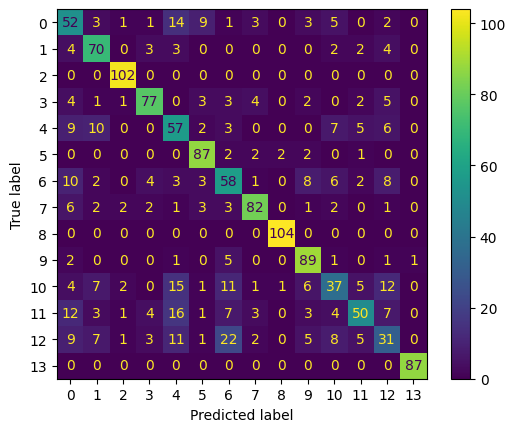

In [190]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()